In [55]:
#importar módulos
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#importar as duas bases de dados - DEMO_PHQ e PAG_HEI

df_phq = pd.read_csv('DEMO_PHQ.csv')
df_hei = pd.read_csv('PAG_HEI.csv')

In [57]:
#analisar primeiros dados dos dois dfs e tratamento de variáveis
df_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [58]:
#lista das colunas do df_phq
df_phq.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC'],
      dtype='object')

In [59]:
#dados faltantes
df_phq.isna().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

Pode-se notar que nesta base existem 498 entradas nulas nas colunas DPQ010 até a DPQ090. Porém não é possível saber se estão na mesma linha ou não. Próximo passo é verificar se correspondem ao mesmo participante.

<AxesSubplot:>

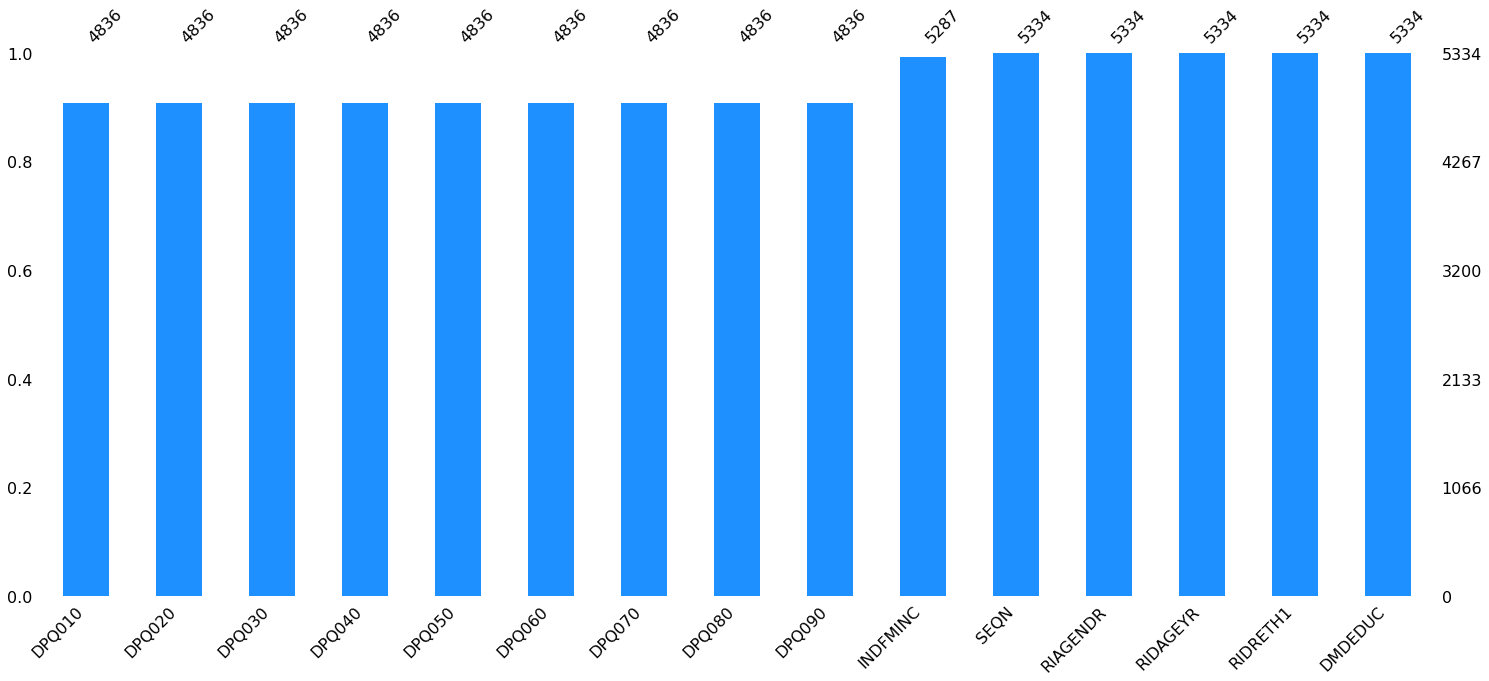

In [60]:
#outra forma de visualizar os dados faltantes com o missingno
msno.bar(df_phq,color="dodgerblue", sort="ascending")

<AxesSubplot:>

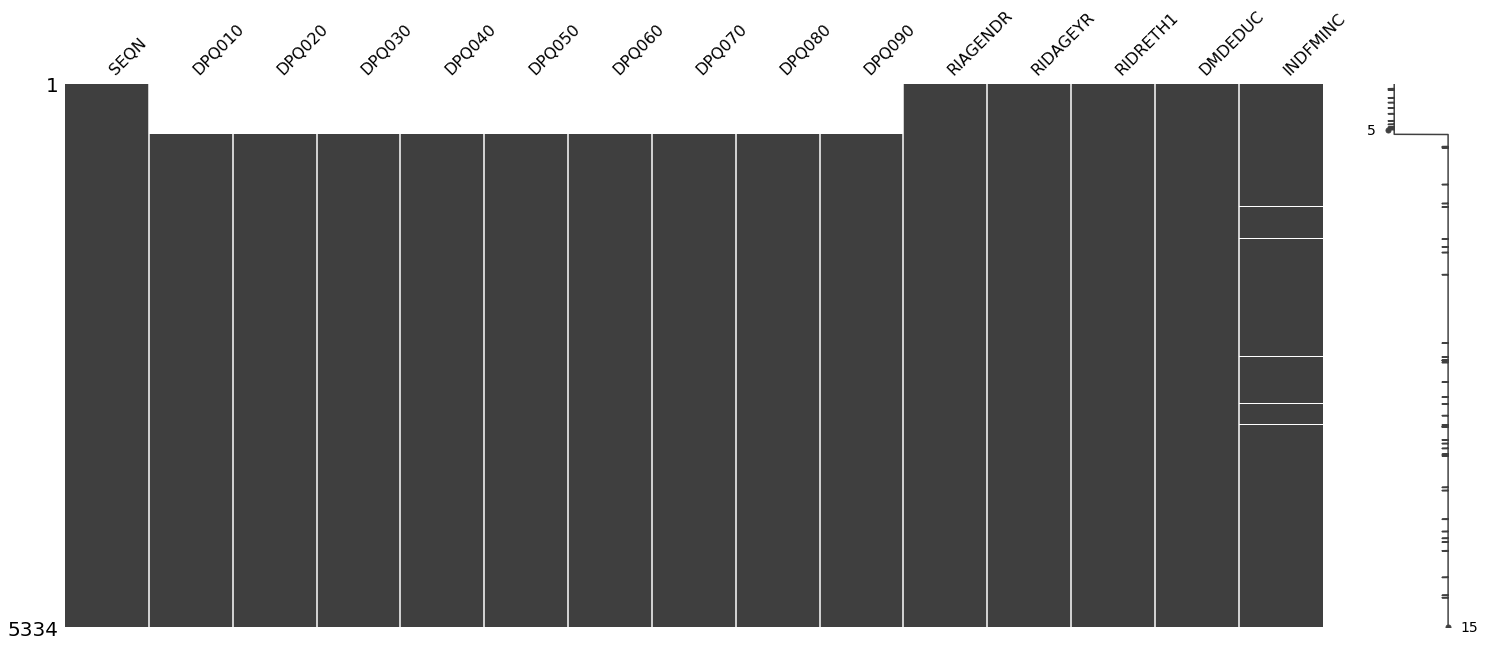

In [61]:
#utilizando o missingo para ter idéia da localização dos dados faltantes
#utilizando a função sort_values na coluna DPQ010
df_phq_missing = df_phq.sort_values(by = 'DPQ010' , na_position='first')
msno.matrix(df_phq_missing)

Analisando o resultado acima, vemos que os 498 dados faltantes das colunas DPQ010 até a DPQ090 estão no mesmo participante, por esta razão irei retirá-los do dataset. Apesar de serem apenas 47 observações faltantes na coluna INDFMINC, analisaremos estes dados para decidir se serão desconsiderados ou não.

In [62]:
df_phq_renda = df_phq[['RIAGENDR','RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC']][df_phq['INDFMINC'].isna()]
df_phq_renda.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
147,2,20,1,2,NaN
356,2,23,1,3,NaN
420,1,22,1,2,NaN
446,2,22,5,5,NaN
474,2,28,1,3,NaN


In [63]:
df_phq_renda.groupby(['RIDRETH1','RIAGENDR','DMDEDUC']).count()

RIDAGEYR  INDFMINC
RIDRETH1 RIAGENDR DMDEDUC                    
1        1        1               4         0
                  2               3         0
                  3               4         0
                  4               1         0
         2        1               6         0
                  2               5         0
                  3               4         0
                  4               2         0
2        1        2               1         0
                  3               1         0
         2        2               2         0
                  3               1         0
3        1        2               1         0
                  3               2         0
                  5               3         0
         2        2               1         0
                  3               3         0
                  4               1         0
4        1        2               1         0
5        2        5               1         0

Neste caso, iremos preencher os valores faltantes com a moda das rendas. Uma vez que praticamente todos os faltantes são da mesma etinia e possuem escolaridade similar

In [69]:
df_phq.fillna(value={'INDFMINC':df_phq['INDFMINC'].mode}, inplace=True)

<AxesSubplot:>

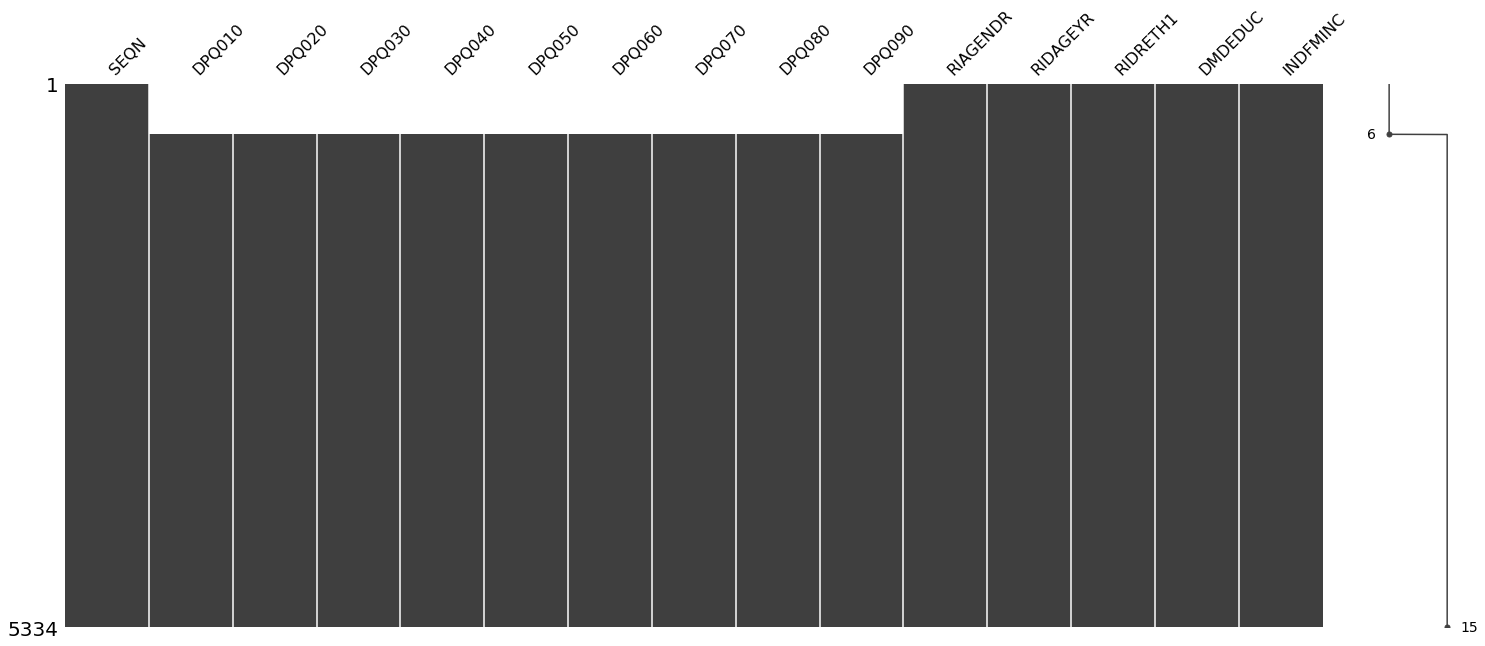

In [73]:
df_phq_missing = df_phq.sort_values(by = 'DPQ010' , na_position='first')
msno.matrix(df_phq_missing)

Agora irei dropar todas as linhas com valores nulos.

In [78]:
df_phq.isna().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC      0
dtype: int64

In [79]:
df_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
